In [172]:
# from google.colab import drive
# import os

# root_dir = '/content/gdrive'
# drive.mount(root_dir)

In [173]:
# !ls /content/gdrive/MyDrive/

In [72]:
import os
import sys

root_dir = os.path.dirname(os.path.dirname(os.path.realpath('__file__')))
model_dir = os.path.join(root_dir, "model")
sys.path.append(root_dir)
sys.path.append(model_dir)

# sys.path.append("/content/gdrive/MyDrive/")  # collab

import time
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import hoho_utils

In [73]:
def suffix_time():
    current_time = time.time()
    local_time = time.localtime(current_time)
    time_str = time.strftime('%Y%m%d%H%M%S', local_time)
    return time_str

In [74]:
#test
hoho_utils.INDEXS_2_PIECES

'KARBNPCkarbnpc'

In [4]:
data_dir = "../output/data"
file_list = os.listdir(data_dir)
file_count = len(file_list)
item_list = list()

print(f"file_count: {file_count}")

for i, filename in enumerate(file_list):
    file_path = os.path.join(data_dir, filename)
    with open(file_path, "r") as file:
        json_str = file.read()
        matches = json.loads(json_str)
        match_count = len(matches)

        for j, match in enumerate(matches):
#             print(f"match: {match}")
#             break

            base_id =  int(time.time() * 1000) + j
            for k, round in enumerate(match):
                match_id = f"{i}-{j}"
                round_id = f"{base_id}{k}"
                state = round[0]
                action = round[2]
                next_state = round[3]
                chapture_list = round[6]
                chaptures = ','.join(chapture_list)
                chapture_reward = round[7]

                win = 0
                done = round[5]
                if "K" in chapture_list:
                    win = -1
                    done = True
                elif "k" in chapture_list:
                    win = 1
                    done = True

                round_dict = {"match_id": match_id,
                              "round_id": round_id,
                              "state": state,
                              "action":action,
                              "next_state": next_state,
                              "done": done,
                              "chaptures": chaptures,
                              "chapture_reward": chapture_reward,
                              "win": win}
                item_list.append(round_dict)

                if win == 1 or win == -1:
                    break

file_count: 107


In [5]:
data = pd.DataFrame(item_list)

In [6]:
data.head(20)

,match_id,round_id,state,action,next_state,done,chaptures,chapture_reward,win
0,0-0,16927627572100,RNBAKABNR/9/1C5C1/P1P1P1P1P/9/9/p1p1p1p1p/1c5c...,f0e1,RNBAK1BNR/4A4/1C5C1/P1P1P1P1P/9/9/p1p1p1p1p/1c...,False,N,-6.28,0
1,0-0,16927627572101,RNBAK1BcR/4A4/1C5C1/P1P1P1P1P/9/9/p1p1p1p1p/1c...,h2g2,RNBAK1BcR/4A4/1C4C2/P1P1P1P1P/9/9/p1p1p1p1p/1c...,True,K,-4.92,-1
2,0-1,16927627572110,RNBAKABNR/9/1C5C1/P1P1P1P1P/9/9/p1p1p1p1p/1c5c...,f0e1,RNBAK1BNR/4A4/1C5C1/P1P1P1P1P/9/9/p1p1p1p1p/1c...,False,N,-6.28,0
3,0-1,16927627572111,RNBAK1BcR/4A4/1C5C1/P1P1P1P1P/9/9/p1p1p1p1p/1c...,h2g2,RNBAK1BcR/4A4/1C4C2/P1P1P1P1P/9/9/p1p1p1p1p/1c...,True,K,-4.92,-1
4,0-2,16927627572120,RNBAKABNR/9/1C5C1/P1P1P1P1P/9/9/p1p1p1p1p/1c5c...,f0e1,RNBAK1BNR/4A4/1C5C1/P1P1P1P1P/9/9/p1p1p1p1p/1c...,False,N,-6.28,0
5,0-2,16927627572121,RNBAK1BcR/4A4/1C5C1/P1P1P1P1P/9/9/p1p1p1p1p/1c...,h2g2,RNBAK1BcR/4A4/1C4C2/P1P1P1P1P/9/9/p1p1p1p1p/1c...,True,K,-4.92,-1
6,0-3,16927627572130,RNBAKABNR/9/1C5C1/P1P1P1P1P/9/9/p1p1p1p1p/1c5c...,f0e1,RNBAK1BNR/4A4/1C5C1/P1P1P1P1P/9/9/p1p1p1p1p/1c...,False,N,-6.28,0
7,0-3,16927627572131,RNBAK1BcR/4A4/1C5C1/P1P1P1P1P/9/9/p1p1p1p1p/1c...,h2g2,RNBAK1BcR/4A4/1C4C2/P1P1P1P1P/9/9/p1p1p1p1p/1c...,True,K,-4.92,-1
8,0-4,16927627572140,RNBAKABNR/9/1C5C1/P1P1P1P1P/9/9/p1p1p1p1p/1c5c...,a0a1,1NBAKABNR/R8/1C5C1/P1P1P1P1P/9/9/p1p1p1p1p/1c5...,False,N,-6.28,0
9,0-4,16927627572141,1cBAKABNR/R8/1C5C1/P1P1P1P1P/9/9/p1p1p1p1p/7c1...,b2b4,1cBAKABNR/R8/7C1/P1P1P1P1P/1C7/9/p1p1p1p1p/7c1...,False,,0.00,0


In [7]:
data.dtypes

match_id            object
round_id            object
state               object
action              object
next_state          object
done                  bool
chaptures           object
chapture_reward    float64
win                  int64
dtype: object

In [8]:
data["converted"] = data["win"].apply(lambda x: 1 if x != 0 else 0)

In [9]:
data

,match_id,round_id,state,action,next_state,done,chaptures,chapture_reward,win,converted
0,0-0,16927627572100,RNBAKABNR/9/1C5C1/P1P1P1P1P/9/9/p1p1p1p1p/1c5c...,f0e1,RNBAK1BNR/4A4/1C5C1/P1P1P1P1P/9/9/p1p1p1p1p/1c...,False,N,-6.28,0,0
1,0-0,16927627572101,RNBAK1BcR/4A4/1C5C1/P1P1P1P1P/9/9/p1p1p1p1p/1c...,h2g2,RNBAK1BcR/4A4/1C4C2/P1P1P1P1P/9/9/p1p1p1p1p/1c...,True,K,-4.92,-1,1
2,0-1,16927627572110,RNBAKABNR/9/1C5C1/P1P1P1P1P/9/9/p1p1p1p1p/1c5c...,f0e1,RNBAK1BNR/4A4/1C5C1/P1P1P1P1P/9/9/p1p1p1p1p/1c...,False,N,-6.28,0,0
3,0-1,16927627572111,RNBAK1BcR/4A4/1C5C1/P1P1P1P1P/9/9/p1p1p1p1p/1c...,h2g2,RNBAK1BcR/4A4/1C4C2/P1P1P1P1P/9/9/p1p1p1p1p/1c...,True,K,-4.92,-1,1
4,0-2,16927627572120,RNBAKABNR/9/1C5C1/P1P1P1P1P/9/9/p1p1p1p1p/1c5c...,f0e1,RNBAK1BNR/4A4/1C5C1/P1P1P1P1P/9/9/p1p1p1p1p/1c...,False,N,-6.28,0,0
...,...,...,...,...,...,...,...,...,...,...
11077,106-31,16927627614211,RNBAK1BcR/4A4/1C5C1/P1P1P1P1P/9/9/p1p1p1p1p/1c...,h2g2,RNBAK1BcR/4A4/1C4C2/P1P1P1P1P/9/9/p1p1p1p1p/1c...,True,K,-4.92,-1,1
11078,106-32,16927627614220,RNBAKABNR/9/1C5C1/P1P1P1P1P/9/9/p1p1p1p1p/1c5c...,f0e1,RNBAK1BNR/4A4/1C5C1/P1P1P1P1P/9/9/p1p1p1p1p/1c...,False,N,-6.28,0,0
11079,106-32,16927627614221,RNBAK1BcR/4A4/1C5C1/P1P1P1P1P/9/9/p1p1p1p1p/1c...,h2g2,RNBAK1BcR/4A4/1C4C2/P1P1P1P1P/9/9/p1p1p1p1p/1c...,True,K,-4.92,-1,1
11080,106-33,16927627614230,RNBAKABNR/9/1C5C1/P1P1P1P1P/9/9/p1p1p1p1p/1c5c...,f0e1,RNBAK1BNR/4A4/1C5C1/P1P1P1P1P/9/9/p1p1p1p1p/1c...,False,N,-6.28,0,0


In [10]:
data[data["converted"] == 0].size, data[data["converted"] == 1].size

(79210, 31610)

### 对棋盘状态进行embedding

In [98]:
!pip install sentence-transformers

In [11]:
from sentence_transformers import SentenceTransformer, util

In [12]:
board_state_model = SentenceTransformer("sentence-transformers/multi-qa-mpnet-base-dot-v1")

# model_path = r"D:\temp\embeddings\multi-qa-mpnet-base-dot-v1"
# board_state_model = SentenceTransformer(model_path)

In [13]:
#test
s = "RNBAKABNR/9/1C5C1/P1P1P1P1P/9/9/p1p1p1p1p/1c5c1/9/rnbakabnr"
s_emb = board_state_model.encode(s)
s_emb.shape

(768,)

In [14]:
#test
s2 = "RNBAK1BNR/4A4/1C5C1/P1P1P1P1P/9/9/p1p1p1p1p/1c5c1/9/rnbakabnr"
s2_emb = board_state_model.encode(s2)
util.pytorch_cos_sim(s_emb, s2_emb)

tensor([[0.9906]])

In [15]:
data["match_id"] = data["match_id"].astype(str)
data["round_id"] = data["round_id"].astype(str)

In [16]:
data["done"] = data["done"].apply(lambda x: 1 if x == True else 0)
data

,match_id,round_id,state,action,next_state,done,chaptures,chapture_reward,win,converted
0,0-0,16927627572100,RNBAKABNR/9/1C5C1/P1P1P1P1P/9/9/p1p1p1p1p/1c5c...,f0e1,RNBAK1BNR/4A4/1C5C1/P1P1P1P1P/9/9/p1p1p1p1p/1c...,0,N,-6.28,0,0
1,0-0,16927627572101,RNBAK1BcR/4A4/1C5C1/P1P1P1P1P/9/9/p1p1p1p1p/1c...,h2g2,RNBAK1BcR/4A4/1C4C2/P1P1P1P1P/9/9/p1p1p1p1p/1c...,1,K,-4.92,-1,1
2,0-1,16927627572110,RNBAKABNR/9/1C5C1/P1P1P1P1P/9/9/p1p1p1p1p/1c5c...,f0e1,RNBAK1BNR/4A4/1C5C1/P1P1P1P1P/9/9/p1p1p1p1p/1c...,0,N,-6.28,0,0
3,0-1,16927627572111,RNBAK1BcR/4A4/1C5C1/P1P1P1P1P/9/9/p1p1p1p1p/1c...,h2g2,RNBAK1BcR/4A4/1C4C2/P1P1P1P1P/9/9/p1p1p1p1p/1c...,1,K,-4.92,-1,1
4,0-2,16927627572120,RNBAKABNR/9/1C5C1/P1P1P1P1P/9/9/p1p1p1p1p/1c5c...,f0e1,RNBAK1BNR/4A4/1C5C1/P1P1P1P1P/9/9/p1p1p1p1p/1c...,0,N,-6.28,0,0
...,...,...,...,...,...,...,...,...,...,...
11077,106-31,16927627614211,RNBAK1BcR/4A4/1C5C1/P1P1P1P1P/9/9/p1p1p1p1p/1c...,h2g2,RNBAK1BcR/4A4/1C4C2/P1P1P1P1P/9/9/p1p1p1p1p/1c...,1,K,-4.92,-1,1
11078,106-32,16927627614220,RNBAKABNR/9/1C5C1/P1P1P1P1P/9/9/p1p1p1p1p/1c5c...,f0e1,RNBAK1BNR/4A4/1C5C1/P1P1P1P1P/9/9/p1p1p1p1p/1c...,0,N,-6.28,0,0
11079,106-32,16927627614221,RNBAK1BcR/4A4/1C5C1/P1P1P1P1P/9/9/p1p1p1p1p/1c...,h2g2,RNBAK1BcR/4A4/1C4C2/P1P1P1P1P/9/9/p1p1p1p1p/1c...,1,K,-4.92,-1,1
11080,106-33,16927627614230,RNBAKABNR/9/1C5C1/P1P1P1P1P/9/9/p1p1p1p1p/1c5c...,f0e1,RNBAK1BNR/4A4/1C5C1/P1P1P1P1P/9/9/p1p1p1p1p/1c...,0,N,-6.28,0,0


In [17]:
data["jid"] = data["match_id"] + "_" + data["round_id"]
data

,match_id,round_id,state,action,next_state,done,chaptures,chapture_reward,win,converted,jid
0,0-0,16927627572100,RNBAKABNR/9/1C5C1/P1P1P1P1P/9/9/p1p1p1p1p/1c5c...,f0e1,RNBAK1BNR/4A4/1C5C1/P1P1P1P1P/9/9/p1p1p1p1p/1c...,0,N,-6.28,0,0,0-0_16927627572100
1,0-0,16927627572101,RNBAK1BcR/4A4/1C5C1/P1P1P1P1P/9/9/p1p1p1p1p/1c...,h2g2,RNBAK1BcR/4A4/1C4C2/P1P1P1P1P/9/9/p1p1p1p1p/1c...,1,K,-4.92,-1,1,0-0_16927627572101
2,0-1,16927627572110,RNBAKABNR/9/1C5C1/P1P1P1P1P/9/9/p1p1p1p1p/1c5c...,f0e1,RNBAK1BNR/4A4/1C5C1/P1P1P1P1P/9/9/p1p1p1p1p/1c...,0,N,-6.28,0,0,0-1_16927627572110
3,0-1,16927627572111,RNBAK1BcR/4A4/1C5C1/P1P1P1P1P/9/9/p1p1p1p1p/1c...,h2g2,RNBAK1BcR/4A4/1C4C2/P1P1P1P1P/9/9/p1p1p1p1p/1c...,1,K,-4.92,-1,1,0-1_16927627572111
4,0-2,16927627572120,RNBAKABNR/9/1C5C1/P1P1P1P1P/9/9/p1p1p1p1p/1c5c...,f0e1,RNBAK1BNR/4A4/1C5C1/P1P1P1P1P/9/9/p1p1p1p1p/1c...,0,N,-6.28,0,0,0-2_16927627572120
...,...,...,...,...,...,...,...,...,...,...,...
11077,106-31,16927627614211,RNBAK1BcR/4A4/1C5C1/P1P1P1P1P/9/9/p1p1p1p1p/1c...,h2g2,RNBAK1BcR/4A4/1C4C2/P1P1P1P1P/9/9/p1p1p1p1p/1c...,1,K,-4.92,-1,1,106-31_16927627614211
11078,106-32,16927627614220,RNBAKABNR/9/1C5C1/P1P1P1P1P/9/9/p1p1p1p1p/1c5c...,f0e1,RNBAK1BNR/4A4/1C5C1/P1P1P1P1P/9/9/p1p1p1p1p/1c...,0,N,-6.28,0,0,106-32_16927627614220
11079,106-32,16927627614221,RNBAK1BcR/4A4/1C5C1/P1P1P1P1P/9/9/p1p1p1p1p/1c...,h2g2,RNBAK1BcR/4A4/1C4C2/P1P1P1P1P/9/9/p1p1p1p1p/1c...,1,K,-4.92,-1,1,106-32_16927627614221
11080,106-33,16927627614230,RNBAKABNR/9/1C5C1/P1P1P1P1P/9/9/p1p1p1p1p/1c5c...,f0e1,RNBAK1BNR/4A4/1C5C1/P1P1P1P1P/9/9/p1p1p1p1p/1c...,0,N,-6.28,0,0,106-33_16927627614230


In [18]:
data[data["jid"].duplicated()] # 怎么jid就重复了？不可能

,match_id,round_id,state,action,next_state,done,chaptures,chapture_reward,win,converted,jid


In [ ]:
# 正式环境不用，这是只是临时修正数据
# current_mid = None
# mid_list_new = []
# row = 0
# i = 0
# cls_id = 0
# done = False
# while row < len(data):
#     row_data = data.iloc[row]
#     check_mid = row_data["match_id"]
#     print(f"check_mid: {check_mid}")

#     count = 0
#     i = row
#     while (check_mid == current_mid or current_mid is None):
#         mid_list_new.append(f"{cls_id}-{count}")
#         print(f"  current_mid: {current_mid}")
#         count = count + 1

#         i = i + 1
#         if i >= len(data):
#             done = True
#             break

#         current_mid = data.iloc[i]["match_id"]


#     if done:
#         break

#     cls_id = cls_id + 1
#     row = row + count
#     current_mid = None


In [ ]:
# 正式环境不用，这是只是临时修正数据
# len(mid_list_new)

In [ ]:
# 正式环境不用，这是只是临时修正数据
# data["mid_new"] = mid_list_new
# data

In [ ]:
# 正式环境不用，这是只是临时修正数据
# data["jid_new"] = data["mid_new"] + "_" + data["round_id"]

In [ ]:
# 正式环境不用，这是只是临时修正数据
# data[data["jid_new"].duplicated()]

In [ ]:
# data.to_excel(f"./hoho_chess_temp.xlsx", index = False)

In [ ]:
# 正式环境不用，这是只是临时修正数据
# data = pd.read_excel(f"./hoho_chess_temp.xlsx")
# data1 = data.drop(["match_id", "round_id", "jid"], axis = 1, inplace = False)

In [ ]:
# data1.dtypes

In [ ]:
# 正式环境不用，这是只是临时修正数据
# data1.groupby("jid_new")["mid_new"].count().reset_index(name = "count")

In [19]:
data.to_excel(f"./outputs/hoho_chess_data_{suffix_time()}.xlsx", index = False)

In [8]:
data = pd.read_excel("hoho_chess_data_20230821004615.xlsx")
# data = pd.read_excel("/content/gdrive/MyDrive/hoho_chess_data_20230821004615.xlsx")  #collab
data.head()

,match_id,round_id,state,action,next_state,done,chaptures,chapture_reward,win,converted,jid
0,0-0,16925499430560,RNBAKABNR/9/1C5C1/P1P1P1P1P/9/9/p1p1p1p1p/1c5c...,f0e1,RNBAK1BNR/4A4/1C5C1/P1P1P1P1P/9/9/p1p1p1p1p/1c...,0,N,-6.28,0,0,0-0_16925499430560
1,0-0,16925499430561,RNBAK1BcR/4A4/1C5C1/P1P1P1P1P/9/9/p1p1p1p1p/1c...,h2g2,RNBAK1BcR/4A4/1C4C2/P1P1P1P1P/9/9/p1p1p1p1p/1c...,1,K,-4.92,-1,1,0-0_16925499430561
2,0-1,16925499430570,RNBAKABNR/9/1C5C1/P1P1P1P1P/9/9/p1p1p1p1p/1c5c...,f0e1,RNBAK1BNR/4A4/1C5C1/P1P1P1P1P/9/9/p1p1p1p1p/1c...,0,N,-6.28,0,0,0-1_16925499430570
3,0-1,16925499430571,RNBAK1BcR/4A4/1C5C1/P1P1P1P1P/9/9/p1p1p1p1p/1c...,h2g2,RNBAK1BcR/4A4/1C4C2/P1P1P1P1P/9/9/p1p1p1p1p/1c...,1,K,-4.92,-1,1,0-1_16925499430571
4,0-2,16925499430580,RNBAKABNR/9/1C5C1/P1P1P1P1P/9/9/p1p1p1p1p/1c5c...,f0e1,RNBAK1BNR/4A4/1C5C1/P1P1P1P1P/9/9/p1p1p1p1p/1c...,0,N,-6.28,0,0,0-2_16925499430580


In [20]:
data[data["chaptures"].isnull()]

,match_id,round_id,state,action,next_state,done,chaptures,chapture_reward,win,converted,jid


In [21]:
data.fillna("", inplace = True)
data[data["chaptures"].isnull()]

,match_id,round_id,state,action,next_state,done,chaptures,chapture_reward,win,converted,jid


In [22]:
data_matchid_group = data.groupby("match_id")["jid"].count().reset_index(name = "count")
data_matchid_group

,match_id,count
0,0-0,2
1,0-1,2
2,0-10,8
3,0-11,2
4,0-12,11
...,...,...
3156,99-5,2
3157,99-6,12
3158,99-7,2
3159,99-8,2


In [23]:
import matplotlib.pyplot as plt

plt.style.use('ggplot')

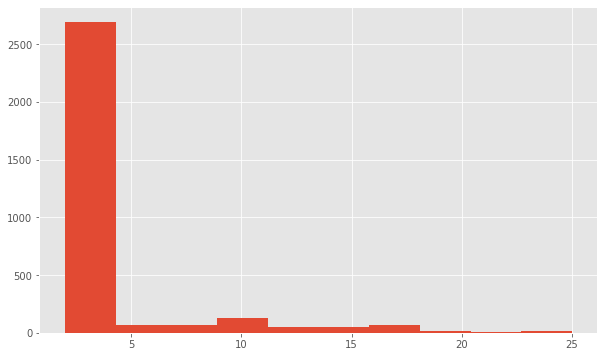

In [24]:
plt.figure(figsize = (10, 6))
plt.hist(data_matchid_group["count"].values)
plt.show()

In [25]:
def encode_pieces_one_hot(pieces):
    result = np.zeros(len(hoho_utils.INDEXS_2_PIECES))
    for p in pieces:
        try:
            index = hoho_utils.PIECES_2_INDEX[p]
            result[index] = 1
        except KeyError as e:
            pass
#             print(f"error: 找不到key! {e}")

    return result


# test
# encode_pieces_one_hot(["N",'K'])
encode_pieces_one_hot([""])

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [26]:
def encode_board_state(board_state, model):
    return model.encode(board_state)


# test
encode_board_state(s, board_state_model)

array([-8.08936637e-03, -3.75740260e-01, -3.93722564e-01,  3.54986414e-02,
       -9.69870612e-02, -1.52960494e-01,  1.33453622e-01,  3.19957435e-01,
       -6.09019846e-02,  1.48095503e-01,  4.13846411e-02,  2.15794966e-01,
        1.60120219e-01,  1.26343686e-02, -2.20054220e-02, -2.27970257e-02,
       -1.01004522e-02,  2.58477449e-01,  6.86705858e-02, -1.43871814e-01,
       -2.28361085e-01,  3.13995659e-01, -8.89739674e-03,  8.84504244e-03,
       -3.00548505e-02,  1.23455346e-01,  1.79964185e-01,  8.72972980e-02,
       -1.92378864e-01,  3.27123627e-02,  5.30861318e-03,  1.61565229e-01,
       -3.71093631e-01,  1.01709150e-01, -9.45823558e-05, -1.11263297e-01,
        9.73066017e-02, -2.70264782e-02, -2.76365846e-01,  3.01053077e-01,
       -1.26016319e-01,  1.34677827e-01, -3.35976481e-01, -2.35981062e-01,
       -1.71674550e-01,  1.04353316e-02,  1.20770983e-01,  1.35088101e-01,
        3.35097820e-01, -7.61319068e-04,  4.42475796e-01, -4.28179055e-02,
       -2.63679381e-02, -

In [27]:
def encode_action_one_hot(all_actions, action = None):
    result= np.zeros(len(all_actions))
    try:
        index = all_actions.index(action)
        result[index] = 1

    except ValueError as e:
        pass
#         print(f"error: 找不到action:{e}")

    return result


# test
all_actions = hoho_utils.get_all_actions()
encode_action_one_hot(all_actions, "b4d4")
# encode_action_one_hot(all_actions, "")

array([0., 0., 0., ..., 0., 0., 0.])

In [28]:
def state_encoding(s):
    return encode_board_state(s, board_state_model)

def action_encoding(a):
    return encode_action_one_hot(all_actions, a)

def chapturs_encoding(c):
    c_list = c.split(",")
    return encode_pieces_one_hot(c_list)

In [29]:
def features_for_logistic_regression(df):
    n, m = df.shape

    states = df["state"].apply(state_encoding).values.tolist()
    actions = df["action"].apply(action_encoding).values.tolist()
    chaptures = df["chaptures"].apply(chapturs_encoding).values.tolist()  # chaptures最好不要用one-hot编码，因为每种棋子可能有多个（如5个兵）
    c_rewards = df["chapture_reward"].values.reshape((n, -1))
    wins = df["win"].values.reshape((n, -1))
    dones = df["done"].values.reshape((n, -1))

    return np.hstack([states, actions, chaptures, c_rewards, wins, dones]), df["converted"].values


# test
X_demo,y_demo = features_for_logistic_regression(data.sample(5))
X_demo.shape, y_demo.shape

((5, 2871), (5,))

In [30]:
from sklearn.model_selection import train_test_split

RANDOM_SEED = 6666

In [241]:
X, y = features_for_logistic_regression(data)

In [242]:
X.shape, y.shape

((9257, 2871), (9257,))

In [243]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = RANDOM_SEED)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size = 0.5, random_state = RANDOM_SEED)

In [244]:
from sklearn.linear_model import LogisticRegression

logisticRegr = LogisticRegression()
logisticRegr.fit(X_train, y_train)
score = logisticRegr.score(X_val, y_val)
print(score)

0.9989200863930886


In [245]:
# 输出模型权重（系数）
coefficients = logisticRegr.coef_
intercept = logisticRegr.intercept_

print("Coefficients:", coefficients[0])
print("Intercept:", intercept)

Coefficients: [ 0.02760835  0.02625673 -0.00453075 ...  0.02034483 -3.97522199
  3.97522199]
Intercept: [-7.21452743]


In [ ]:
# demo
# import pandas as pd
# import numpy as np

# # 创建一个示例的DataFrame，假设你已经有了这个数据
# data = {
#     'feature1': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18],
#     'feature2': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8],
#     'match': ['A', 'A', 'A', 'A', 'A', 'B', 'B', 'B', 'B', 'B', 'B', 'C', 'C', 'C', 'C', 'C', 'C', 'C']
# }

# df = pd.DataFrame(data)
# df


In [ ]:
# 根据'match'列的值进行分组
# grouped = df.groupby('match')

# # 定义一个函数来处理每个分组
# def process_group(group):
#     # 获取分组中的样本数量
#     group_size = len(group)

#     # 如果样本数量超过15个，裁剪多余的样本
#     if group_size > 6:
# #         group = group.sample(n=15, random_state=42)
#         group = group.head(6)

#     # 如果样本数量不足15个，使用0填充剩余的部分
#     elif group_size < 6:
#         num_to_add = 6 - group_size
#         to_add = pd.DataFrame({'feature1': [0] * num_to_add, 'feature2': [0.0] * num_to_add, 'match': [group['match'].iloc[0]] * num_to_add})
#         group = pd.concat([group, to_add], ignore_index=True)

#     return group

# # 对每个分组应用处理函数，并重新组合回一个新的DataFrame
# processed_groups = grouped.apply(process_group)

# # 重新排序并重置索引
# processed_data = processed_groups.reset_index(drop=True)

# processed_data

In [31]:
def features_for_lstm(df, max_step = 15):

    # 定义一个函数来处理每个分组
    def process_group(group, max_group_size, num_features):
        # 获取分组中的样本数量
        group_size = len(group)

#         print(group_size, max_group_size, num_features)

        # 如果样本数量超过max_group_size个，裁剪多余的样本
        if group_size > max_group_size:
            group = group.head(max_group_size)

        # 如果样本数量不足max_group_size个，使用0填充剩余的部分
        elif group_size < max_group_size:
            num_to_add = max_group_size - group_size
            to_add = pd.DataFrame({'features': np.zeros((num_to_add, num_features)).tolist(),
                                   'match_id': [group['match_id'].iloc[0]] * num_to_add,
                                   "converted": [0] * num_to_add})
            group = pd.concat([group, to_add], ignore_index = True)

        return group


    n, m = df.shape

    df_ext = df.copy()

    states = df_ext["state"].apply(state_encoding).values.tolist()
    actions = df_ext["action"].apply(action_encoding).values.tolist()
    chaptures = df_ext["chaptures"].apply(chapturs_encoding).values.tolist()
    c_rewards = df_ext["chapture_reward"].values.reshape((n, -1))
    wins = df_ext["win"].values.reshape((n, -1))
    dones = df_ext["done"].values.reshape((n, -1))

    # hoho_todo: 根据round_id升序排序

    print(f"state: {np.array(states).shape}")
    print(f"actions: {np.array(actions).shape}")
    print(f"chaptures: {np.array(chaptures).shape}")
    print(f"c_reards: {np.array(c_rewards).shape}")
    print(f"wins: {wins.shape}")
    print(f"dones: {dones.shape}")

    features = np.hstack([states, actions, chaptures, c_rewards, wins, dones])

    _, f_m = features.shape
#     print(features.shape)
#     print(features)

    df_ext["features"] = features.tolist()   # 这里要转为list才能正常赋值

    group = df_ext.groupby("match_id")
    process_group = group.apply(lambda group: process_group(group, max_step, f_m))
    process_data = process_group.reset_index(drop = True)

    features = np.array(process_data["features"].values.tolist()).reshape((-1, max_step, f_m))
    labels = np.array(process_data["converted"].values.tolist()).reshape((-1, max_step))
    labels = np.max(labels, axis = 1)
    return features, labels, process_data



# test
# data.head(17) # 头17刚好5轮
X_demo, y_demo, process_data = features_for_lstm(data.head(17))
X_demo.shape, y_demo.shape

state: (17, 768)
actions: (17, 2086)
chaptures: (17, 14)
c_reards: (17, 1)
wins: (17, 1)
dones: (17, 1)


((5, 15, 2871), (5,))

In [32]:
y_demo

array([1, 1, 1, 1, 1])

In [33]:
process_data

,match_id,round_id,state,action,next_state,done,chaptures,chapture_reward,win,converted,jid,features
0,0-0,16927627572100,RNBAKABNR/9/1C5C1/P1P1P1P1P/9/9/p1p1p1p1p/1c5c...,f0e1,RNBAK1BNR/4A4/1C5C1/P1P1P1P1P/9/9/p1p1p1p1p/1c...,0.0,N,-6.28,0.0,0,0-0_16927627572100,"[-0.008089366368949413, -0.37574025988578796, ..."
1,0-0,16927627572101,RNBAK1BcR/4A4/1C5C1/P1P1P1P1P/9/9/p1p1p1p1p/1c...,h2g2,RNBAK1BcR/4A4/1C4C2/P1P1P1P1P/9/9/p1p1p1p1p/1c...,1.0,K,-4.92,-1.0,1,0-0_16927627572101,"[0.010773270390927792, -0.41175973415374756, -..."
2,0-0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,0-0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,0-0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...
70,0-4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
71,0-4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
72,0-4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
73,0-4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [34]:
process_data["match_id"].value_counts()

0-0    15
0-1    15
0-2    15
0-3    15
0-4    15
Name: match_id, dtype: int64

In [35]:
X, y, _ = features_for_lstm(data, max_step = 15)

state: (11082, 768)
actions: (11082, 2086)
chaptures: (11082, 14)
c_reards: (11082, 1)
wins: (11082, 1)
dones: (11082, 1)


In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = RANDOM_SEED)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size = 0.5, random_state = RANDOM_SEED)

In [37]:
X_train.shape, y_train.shape

((2528, 15, 2871), (2528,))

### 用普通LSTM训练

In [38]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

In [39]:
HIDDEN_SIZE = 256
OUTPUT_SIZE = 1
BATCH_SIZE = 64
EPOCHS = 100
LEARNING_RATE = 5e-5
WEIGHT_DECAY = 1e-4
DEVICE = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [40]:
X_train = torch.tensor(X_train, dtype=torch.float32).to(DEVICE)
y_train = torch.tensor(y_train, dtype=torch.float32).to(DEVICE)
X_val = torch.tensor(X_val, dtype=torch.float32).to(DEVICE)
y_val = torch.tensor(y_val, dtype=torch.float32).to(DEVICE)
X_test = torch.tensor(X_test, dtype=torch.float32).to(DEVICE)
y_test = torch.tensor(y_test, dtype=torch.float32).to(DEVICE)

print(f"train: {X_train.shape},{y_train.shape}")
print(f"val: {X_val.shape},{y_val.shape}")
print(f"test: {X_test.shape},{y_test.shape}")

train: torch.Size([2528, 15, 2871]),torch.Size([2528])
val: torch.Size([317, 15, 2871]),torch.Size([317])
test: torch.Size([316, 15, 2871]),torch.Size([316])


In [41]:
n_features = X_train.shape[-1]

In [42]:
class LSTMModel(nn.Module):

    def __init__(self, input_size, hidden_size, output_size):
        super(LSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, batch_first = True, dropout=0.2, bidirectional = False)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        out, _ = self.lstm(x)
        out = out[:, -1, :]  # Select only the output of the last time step
        out = self.fc(out)
        out = torch.sigmoid(out)  # Apply sigmoid activation for binary classification

        return out

In [50]:
model = LSTMModel(n_features, HIDDEN_SIZE, OUTPUT_SIZE).to(DEVICE)
optimizer = optim.Adam(model.parameters(), lr = LEARNING_RATE, weight_decay = WEIGHT_DECAY)
criterion = nn.BCELoss()

D:\ProgramData\Anaconda3\envs\hoho_gym\lib\site-packages\torch\nn\modules\rnn.py:62: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


In [51]:
model

LSTMModel(
  (lstm): LSTM(2871, 256, batch_first=True, dropout=0.2)
  (fc): Linear(in_features=256, out_features=1, bias=True)
)

In [57]:
def train(model, loss_fn, optimizer, X_train, y_train, X_val, y_val):
    model.train()
    train_loss_list = []
    val_loss_list = []
    
    for epoch in range(EPOCHS):

        train_loss = 0.0
        for i in range(0, len(X_train), BATCH_SIZE):
            inputs = X_train[i: i + BATCH_SIZE]
            labels = y_train[i: i + BATCH_SIZE]

            outputs = model(inputs)
            loss = loss_fn(outputs.squeeze(), labels)
            train_loss += loss.item()

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

        # 验证
        with torch.no_grad():
            val_outputs = model(X_val)
            val_loss = loss_fn(val_outputs.squeeze(), y_val)
            val_loss_list.append(val_loss.item())
        
        train_loss_list.append(train_loss / BATCH_SIZE)
        
        print(f"Epoch [{epoch + 1} / {EPOCHS}], Loss: {train_loss / BATCH_SIZE :.5f}, Val Loss: {val_loss.item():.5f}")

    return train_loss_list, val_loss_list

In [53]:
train(model, criterion, optimizer, X_train, y_train, X_val, y_val)

Epoch [1 / 100], Loss: 0.40717, Val Loss: 0.65081
Epoch [2 / 100], Loss: 0.37886, Val Loss: 0.58515
Epoch [3 / 100], Loss: 0.25784, Val Loss: 0.07234
Epoch [4 / 100], Loss: 0.03073, Val Loss: 0.02731
Epoch [5 / 100], Loss: 0.01964, Val Loss: 0.02130
Epoch [6 / 100], Loss: 0.01732, Val Loss: 0.01897
Epoch [7 / 100], Loss: 0.01604, Val Loss: 0.01741
Epoch [8 / 100], Loss: 0.01513, Val Loss: 0.01628
Epoch [9 / 100], Loss: 0.01443, Val Loss: 0.01539
Epoch [10 / 100], Loss: 0.01385, Val Loss: 0.01466
Epoch [11 / 100], Loss: 0.01335, Val Loss: 0.01403
Epoch [12 / 100], Loss: 0.01293, Val Loss: 0.01346
Epoch [13 / 100], Loss: 0.01256, Val Loss: 0.01292
Epoch [14 / 100], Loss: 0.01223, Val Loss: 0.01240
Epoch [15 / 100], Loss: 0.01192, Val Loss: 0.01192
Epoch [16 / 100], Loss: 0.01164, Val Loss: 0.01146
Epoch [17 / 100], Loss: 0.01137, Val Loss: 0.01103
Epoch [18 / 100], Loss: 0.01110, Val Loss: 0.01062
Epoch [19 / 100], Loss: 0.01084, Val Loss: 0.01023
Epoch [20 / 100], Loss: 0.01059, Val Los

In [44]:
def test(model, X_test, y_test):
    model.eval()
    correct = 0
    with torch.no_grad():
        for i in range(0, len(X_test)):
            input_data = X_test[i]
            input_data = input_data.unsqueeze(dim = 0)
            label = y_test[i]

            output = model(input_data)
            predicted = float((output.item() >= 0.5))
            correct += (label == predicted)


        print(f"Test accuracy：{correct / X_test.shape[0]}")

In [55]:
test(model, X_test, y_test)

Test accuracy：0.9967532753944397


In [58]:
# 按论文，增加注意力机制的LSTM

class AttentionLayer(nn.Module):
    
    def __init__(self, lstm_size, units):
        super(AttentionLayer, self).__init__()
        self.w = nn.Parameter(torch.Tensor(lstm_size, units))  # 可训练的参数
        self.b = nn.Parameter(torch.zeros(1, units))  # 可训练的参数

    def forward(self, x):
        e1 = F.relu(torch.matmul(x, self.w) + self.b)  # x shape: (batches, steps, features)
        a = F.softmax(e1, dim=1)
        output = a * x

        return e1, torch.sum(output, dim=1)


class LstmAttentionModel(nn.Module):

    def __init__(self, num_feats, lstm_size):
        super(LstmAttentionModel, self).__init__()

        self.lstm1 = nn.LSTM(num_feats, lstm_size, dropout = 0.05, batch_first = True, bidirectional = False)
        self.lstm2 = nn.LSTM(lstm_size, lstm_size, dropout = 0.05, batch_first = True, bidirectional = False)
        self.lstm3 = nn.LSTM(lstm_size, lstm_size, dropout = 0.05, batch_first = True, bidirectional = False)
        self.lstm4 = nn.LSTM(lstm_size, 256, dropout = 0.05, batch_first = True, bidirectional = False)
        self.lstm5 = nn.LSTM(256, lstm_size, dropout = 0.05, batch_first = True, bidirectional = False)
        self.lstm6 = nn.LSTM(lstm_size, lstm_size, dropout = 0.05, batch_first = True, bidirectional = False)

        self.attention = AttentionLayer(lstm_size, 1)
        self.output_layer = nn.Linear(lstm_size, 1)

    def forward(self, x):
        lstm_layer1, _ = self.lstm1(x)
        lstm_layer2, _ = self.lstm2(lstm_layer1)
        lstm_layer3, _ = self.lstm3(lstm_layer2)
        lstm_layer4, _ = self.lstm4(lstm_layer3)
        lstm_layer5, _ = self.lstm5(lstm_layer4)
        lstm_layer6, _ = self.lstm6(lstm_layer5)

        a_unsc, attention = self.attention(lstm_layer6)

        out = self.output_layer(attention)
        out = torch.sigmoid(out)

        return out

    def get_attention_weight(self, x):
        lstm_layer1, _ = self.lstm1(x)
        lstm_layer2, _ = self.lstm2(lstm_layer1)
        lstm_layer3, _ = self.lstm3(lstm_layer2)
        lstm_layer4, _ = self.lstm4(lstm_layer3)
        lstm_layer5, _ = self.lstm5(lstm_layer4)
        lstm_layer6, _ = self.lstm6(lstm_layer5)

        a_unsc, _ = self.attention(lstm_layer6)
        a = F.softmax(a_unsc, dim=1)

        return a

In [59]:
model2 = LstmAttentionModel(n_features, HIDDEN_SIZE).to(DEVICE)
optimizer = optim.Adam(model2.parameters(), lr = LEARNING_RATE, weight_decay = WEIGHT_DECAY)
criterion = nn.BCELoss()

In [60]:
model2

LstmAttentionModel(
  (lstm1): LSTM(2871, 256, batch_first=True, dropout=0.05)
  (lstm2): LSTM(256, 256, batch_first=True, dropout=0.05)
  (lstm3): LSTM(256, 256, batch_first=True, dropout=0.05)
  (lstm4): LSTM(256, 256, batch_first=True, dropout=0.05)
  (lstm5): LSTM(256, 256, batch_first=True, dropout=0.05)
  (lstm6): LSTM(256, 256, batch_first=True, dropout=0.05)
  (attention): AttentionLayer()
  (output_layer): Linear(in_features=256, out_features=1, bias=True)
)

In [61]:
train_loss_list, val_loss_list = train(model2, criterion, optimizer, X_train, y_train, X_val, y_val)

Epoch [1 / 100], Loss: 0.40249, Val Loss: 0.60177
Epoch [2 / 100], Loss: 0.25990, Val Loss: 0.17496
Epoch [3 / 100], Loss: 0.09214, Val Loss: 0.17470
Epoch [4 / 100], Loss: 0.09176, Val Loss: 0.17275
Epoch [5 / 100], Loss: 0.09146, Val Loss: 0.17275
Epoch [6 / 100], Loss: 0.09138, Val Loss: 0.17259
Epoch [7 / 100], Loss: 0.09129, Val Loss: 0.17246
Epoch [8 / 100], Loss: 0.09121, Val Loss: 0.17232
Epoch [9 / 100], Loss: 0.09111, Val Loss: 0.17213
Epoch [10 / 100], Loss: 0.09096, Val Loss: 0.17183
Epoch [11 / 100], Loss: 0.09068, Val Loss: 0.17102
Epoch [12 / 100], Loss: 0.08940, Val Loss: 0.16356
Epoch [13 / 100], Loss: 0.06821, Val Loss: 0.10227
Epoch [14 / 100], Loss: 0.04801, Val Loss: 0.08462
Epoch [15 / 100], Loss: 0.04286, Val Loss: 0.07678
Epoch [16 / 100], Loss: 0.04022, Val Loss: 0.07092
Epoch [17 / 100], Loss: 0.03787, Val Loss: 0.06684
Epoch [18 / 100], Loss: 0.03559, Val Loss: 0.06313
Epoch [19 / 100], Loss: 0.03454, Val Loss: 0.06101
Epoch [20 / 100], Loss: 0.03359, Val Los

In [137]:
# 转为onnx方便可视化模型架构用
x = torch.randn(1,15,2871,requires_grad=True).to(DEVICE)
torch.onnx.export(model2, x, 'best.onnx', input_names=["inputs"], output_names=["outputs"], verbose='True')

D:\ProgramData\Anaconda3\envs\hoho_gym\lib\site-packages\torch\onnx\symbolic_opset9.py:2188: UserWarning: Exporting a model to ONNX with a batch_size other than 1, with a variable length with LSTM can cause an error when running the ONNX model with a different batch size. Make sure to save the model with a batch size of 1, or define the initial states (h0/c0) as inputs of the model. 
  warnings.warn("Exporting a model to ONNX with a batch_size other than 1, " +


graph(%inputs : Float(1, 15, 2871, strides=[43065, 2871, 1], requires_grad=1, device=cuda:0),
      %attention.w : Float(256, 1, strides=[1, 1], requires_grad=1, device=cuda:0),
      %attention.b : Float(1, 1, strides=[1, 1], requires_grad=1, device=cuda:0),
      %output_layer.weight : Float(1, 256, strides=[256, 1], requires_grad=1, device=cuda:0),
      %output_layer.bias : Float(1, strides=[1], requires_grad=1, device=cuda:0),
      %328 : Float(1, 1024, 2871, strides=[2939904, 2871, 1], requires_grad=0, device=cuda:0),
      %329 : Float(1, 1024, 256, strides=[262144, 256, 1], requires_grad=0, device=cuda:0),
      %330 : Float(1, 2048, strides=[2048, 1], requires_grad=0, device=cuda:0),
      %331 : Long(1, strides=[1], requires_grad=0, device=cpu),
      %332 : Long(1, strides=[1], requires_grad=0, device=cpu),
      %350 : Float(1, 1024, 256, strides=[262144, 256, 1], requires_grad=0, device=cuda:0),
      %351 : Float(1, 1024, 256, strides=[262144, 256, 1], requires_grad=0, d

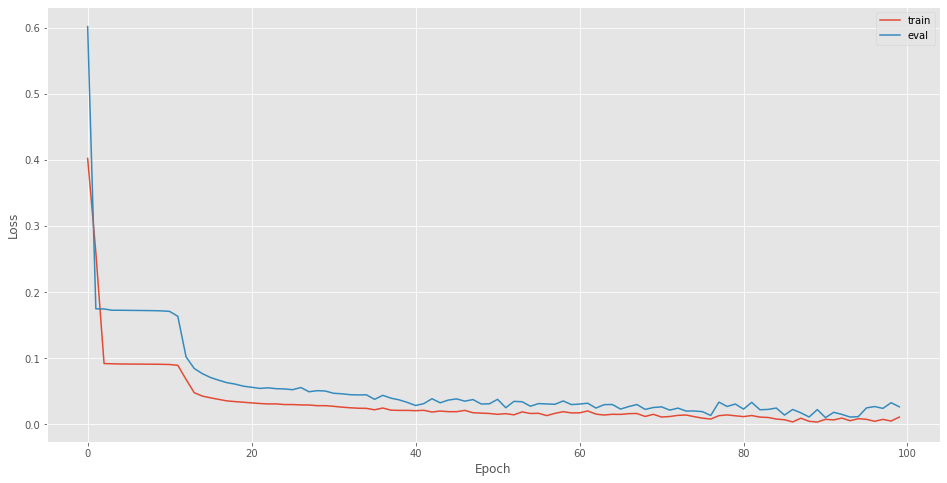

In [63]:
fig = plt.figure(figsize=(16, 8))
plt.plot(range(len(train_loss_list)), train_loss_list, label = "train")
plt.plot(range(len(val_loss_list)), val_loss_list, label = "eval")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

In [54]:
test(model2, X_test, y_test)

Test accuracy：0.9905063509941101


In [64]:
X_data = torch.tensor(X, dtype = torch.float32).to(DEVICE)
attention_weight = model2.get_attention_weight(X_data)
attention_weight = attention_weight.cpu().detach().numpy()

In [65]:
action_count = len(hoho_utils.get_all_actions())
print(f"action count: {action_count}")

action count: 2086


In [66]:
def get_action_index(x_step):
    start_idx = 768
    end_idx = start_idx + action_count - 1
    return np.argmax(x_step[start_idx: end_idx])

In [67]:
X_data = X_data.cpu().detach().numpy()
attributions = np.zeros(action_count)
actions_freq = np.ones(action_count)
for i, step_list in enumerate(attention_weight):
    for step, step_contribution in enumerate(step_list):
        action_idx = get_action_index(X_data[i][step])
        attributions[action_idx] = attributions[action_idx] + step_contribution
        actions_freq[action_idx] = actions_freq[action_idx] + 1

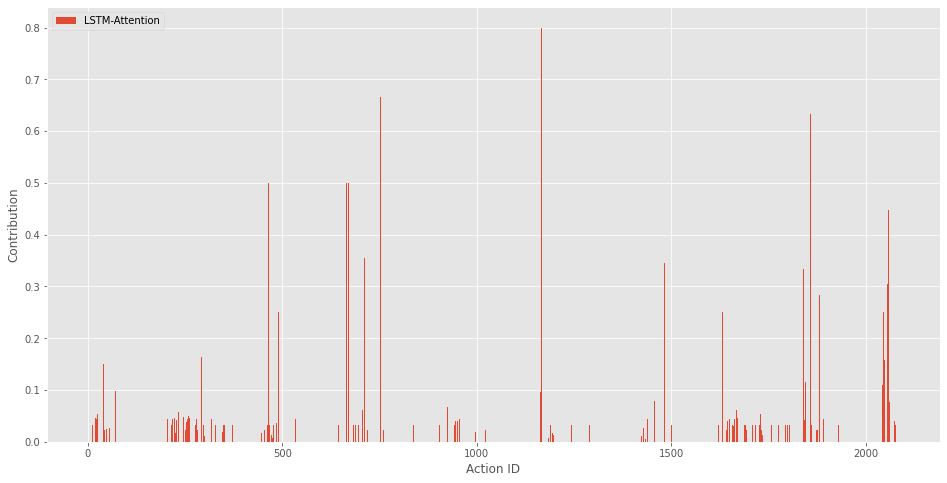

In [68]:
lstm_a = (attributions/actions_freq)

# action_idx_range = range(300, 1200)

fig = plt.figure(figsize=(16, 8))
ax = fig.add_subplot(111)
plt.bar(range(len(lstm_a)), lstm_a, label='LSTM-Attention')
plt.xlabel('Action ID')
plt.ylabel('Contribution')
plt.legend(loc='upper left')
# plt.show()
plt.savefig(f"./outputs/action_contribution_{suffix_time()}.png")

In [69]:
action_contribution_data = pd.DataFrame({"action_type": hoho_utils.get_all_actions(), "contribution": lstm_a})

In [70]:
action_contribution_data.to_excel(f"./outputs/hoho_action_contirbution_{suffix_time()}.xlsx", index = False)

In [75]:
file_path = "./outputs/hoho_action_contirbution_maxstep15_win-lose-1_20230823141526.xlsx"
contribution_data = pd.read_excel(file_path)

In [76]:
contribution_data

,action_type,contribution
0,a0b0,0.066552
1,a0c0,0.188889
2,a0d0,0.000000
3,a0e0,0.000000
4,a0f0,0.000000
...,...,...
2081,e7c9,0.000000
2082,e7g5,0.000000
2083,g5e7,0.000000
2084,g9i7,0.000000


In [77]:
file_path2 = "./outputs/hoho_chess_data_20230823115303.xlsx"
chess_data = pd.read_excel(file_path2)

In [78]:
chess_data

,match_id,round_id,state,action,next_state,done,chaptures,chapture_reward,win,converted,jid
0,0-0,16927627572100,RNBAKABNR/9/1C5C1/P1P1P1P1P/9/9/p1p1p1p1p/1c5c...,f0e1,RNBAK1BNR/4A4/1C5C1/P1P1P1P1P/9/9/p1p1p1p1p/1c...,0,N,-6.28,0,0,0-0_16927627572100
1,0-0,16927627572101,RNBAK1BcR/4A4/1C5C1/P1P1P1P1P/9/9/p1p1p1p1p/1c...,h2g2,RNBAK1BcR/4A4/1C4C2/P1P1P1P1P/9/9/p1p1p1p1p/1c...,1,K,-4.92,-1,1,0-0_16927627572101
2,0-1,16927627572110,RNBAKABNR/9/1C5C1/P1P1P1P1P/9/9/p1p1p1p1p/1c5c...,f0e1,RNBAK1BNR/4A4/1C5C1/P1P1P1P1P/9/9/p1p1p1p1p/1c...,0,N,-6.28,0,0,0-1_16927627572110
3,0-1,16927627572111,RNBAK1BcR/4A4/1C5C1/P1P1P1P1P/9/9/p1p1p1p1p/1c...,h2g2,RNBAK1BcR/4A4/1C4C2/P1P1P1P1P/9/9/p1p1p1p1p/1c...,1,K,-4.92,-1,1,0-1_16927627572111
4,0-2,16927627572120,RNBAKABNR/9/1C5C1/P1P1P1P1P/9/9/p1p1p1p1p/1c5c...,f0e1,RNBAK1BNR/4A4/1C5C1/P1P1P1P1P/9/9/p1p1p1p1p/1c...,0,N,-6.28,0,0,0-2_16927627572120
...,...,...,...,...,...,...,...,...,...,...,...
11077,106-31,16927627614211,RNBAK1BcR/4A4/1C5C1/P1P1P1P1P/9/9/p1p1p1p1p/1c...,h2g2,RNBAK1BcR/4A4/1C4C2/P1P1P1P1P/9/9/p1p1p1p1p/1c...,1,K,-4.92,-1,1,106-31_16927627614211
11078,106-32,16927627614220,RNBAKABNR/9/1C5C1/P1P1P1P1P/9/9/p1p1p1p1p/1c5c...,f0e1,RNBAK1BNR/4A4/1C5C1/P1P1P1P1P/9/9/p1p1p1p1p/1c...,0,N,-6.28,0,0,106-32_16927627614220
11079,106-32,16927627614221,RNBAK1BcR/4A4/1C5C1/P1P1P1P1P/9/9/p1p1p1p1p/1c...,h2g2,RNBAK1BcR/4A4/1C4C2/P1P1P1P1P/9/9/p1p1p1p1p/1c...,1,K,-4.92,-1,1,106-32_16927627614221
11080,106-33,16927627614230,RNBAKABNR/9/1C5C1/P1P1P1P1P/9/9/p1p1p1p1p/1c5c...,f0e1,RNBAK1BNR/4A4/1C5C1/P1P1P1P1P/9/9/p1p1p1p1p/1c...,0,N,-6.28,0,0,106-33_16927627614230


In [79]:
matchid_group = chess_data.groupby("match_id")["jid"].count().reset_index(name = "count")

In [80]:
matchid_group.sort_values(by = "count", ascending = False)

,match_id,count
3153,99-27,25
2662,82-7,25
209,103-14,24
2266,70-29,24
2919,91-5,24
...,...,...
1171,37-22,2
1172,37-23,2
1174,37-25,2
1175,37-26,2


In [129]:
hoho_match_data = chess_data[chess_data["match_id"] == "99-27"]
actions_list = hoho_match_data["action"].values
hoho_match_contribution_data = contribution_data[contribution_data["action_type"].isin(actions_list)]
total_contribution = hoho_match_contribution_data["contribution"].sum()
hoho_match_contribution_data["mine"] = hoho_match_contribution_data["contribution"].apply(lambda c: c / total_contribution * len(actions_list) * (-1))
hoho_match_contribution_data["alphago_zero"] = len(actions_list) * [-1]

C:\Users\Administrator\AppData\Local\Temp\ipykernel_1649084\3170058428.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hoho_match_contribution_data["mine"] = hoho_match_contribution_data["contribution"].apply(lambda c: c / total_contribution * len(actions_list) * (-1))
C:\Users\Administrator\AppData\Local\Temp\ipykernel_1649084\3170058428.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hoho_match_contribution_data["alphago_zero"] = len(actions_list) * [-1]


In [130]:
hoho_match_contribution_data

,action_type,contribution,mine,alphago_zero
223,b0c2,0.046377,-0.629109,-1
256,b2b4,0.044519,-0.603908,-1
292,b4c4,0.162963,-2.210620,-1
488,c2d0,0.000000,-0.000000,-1
680,d0c2,0.000000,-0.000000,-1
710,d2f2,0.026667,-0.361738,-1
715,d2d1,0.250000,-3.391293,-1
908,e0e1,0.039700,-0.538542,-1
925,e1f1,0.034203,-0.463968,-1
930,e1e2,0.037576,-0.509722,-1


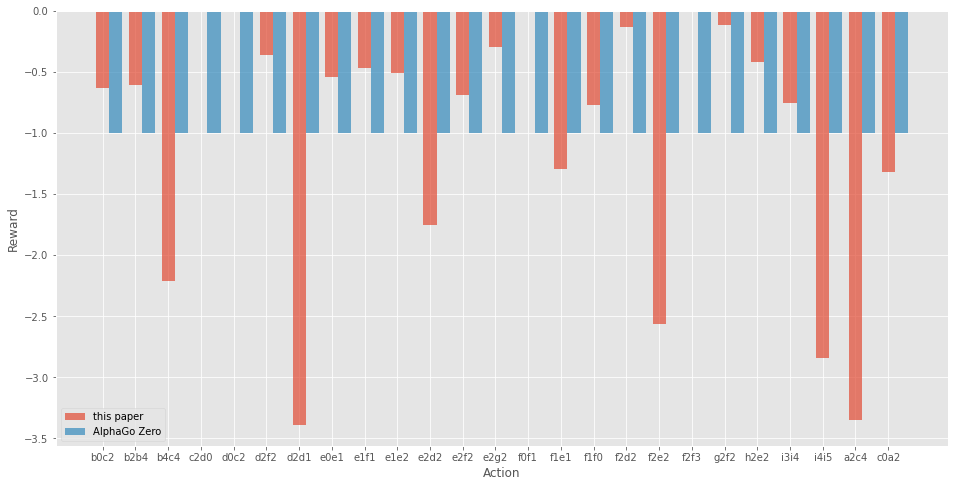

In [134]:
custom_ticks = list(range(len(hoho_match_contribution_data)))
custom_labels = hoho_match_contribution_data["action_type"].values.tolist()
plt.figure(figsize = (16, 8))
plt.bar(range(len(hoho_match_contribution_data)), hoho_match_contribution_data["mine"], width=0.4, alpha=0.7, label='this paper' )
plt.bar([i + 0.4 for i in range(len(hoho_match_contribution_data))], hoho_match_contribution_data["alphago_zero"], width=0.4, alpha=0.7, label='AlphaGo Zero'  )
plt.xticks(custom_ticks, custom_labels)
plt.xlabel('Action')
plt.ylabel('Reward')
plt.legend(loc='lower left')
plt.show()

In [102]:
chess_data[chess_data["win"] == 1]

,match_id,round_id,state,action,next_state,done,chaptures,chapture_reward,win,converted,jid
6405,61-8,16927627595589,RNBc5/5K3/8B/P1P1P1P1P/9/5np2/p1p1p3p/1c6b/4a4...,c9e9,RNBc5/5K3/8B/P1P1P1P1P/9/5np2/p1p1p3p/1c6b/4a4...,1,k,4.92,1,1,61-8_16927627595589


In [105]:
chess_data[chess_data["match_id"] == "61-8"]

,match_id,round_id,state,action,next_state,done,chaptures,chapture_reward,win,converted,jid
6396,61-8,16927627595580,RNBAKABNR/9/1C5C1/P1P1P1P1P/9/9/p1p1p1p1p/1c5c...,e0e1,RNBA1ABNR/4K4/1C5C1/P1P1P1P1P/9/9/p1p1p1p1p/1c...,0,N,-6.28,0,0,61-8_16927627595580
6397,61-8,16927627595581,RNBA1ABcR/4K4/1C5C1/P1P1P1P1P/9/9/p1p1p1p1p/1c...,h2h5,RNBA1ABcR/4K4/1C7/P1P1P1P1P/9/7C1/p1p1p1p1p/1c...,0,A,-4.10,0,0,61-8_16927627595581
6398,61-8,16927627595582,RNBA1cB1R/4K4/1C7/P1P1P1P1P/9/7C1/p1p1p1p1p/1c...,b2f2,RNBA1cB1R/4K4/5C3/P1P1P1P1P/9/7C1/p1p1p1p1p/1c...,0,R,-27.87,0,0,61-8_16927627595582
6399,61-8,16927627595583,RNBA2B1c/4K4/5C3/P1P1P1P1P/9/7C1/p1p1p1p1p/1c7...,h5f5,RNBA2B1c/4K4/5C3/P1P1P1P1P/9/5C3/p1p1p1p1p/1c7...,0,A,-4.10,0,0,61-8_16927627595583
6400,61-8,16927627595584,RNBc2B2/4K4/5C3/P1P1P1P1P/9/5C3/p1p1p1p1p/1c7/...,e1f1,RNBc2B2/5K3/5C3/P1P1P1P1P/9/5C3/p1p1p1p1p/1c7/...,0,NaN,0.00,0,0,61-8_16927627595584
6401,61-8,16927627595585,RNBc2B2/5K3/5C3/P1P1P1P1P/9/5C3/p1p1p1p1p/1c7/...,f2f4,RNBc2B2/5K3/9/P1P1P1P1P/5C3/5C3/p1p1p1p1p/1c7/...,0,NaN,0.00,0,0,61-8_16927627595585
6402,61-8,16927627595586,RNBc2B2/5K3/9/P1P1P1P1P/5C3/5C3/p1p1p1p1p/1c4n...,g0i2,RNBc5/5K3/8B/P1P1P1P1P/5C3/5C3/p1p1p1p1p/1c4n2...,0,NaN,0.00,0,0,61-8_16927627595586
6403,61-8,16927627595587,RNBc5/5K3/8B/P1P1P1P1P/5C3/5Cp2/p1p1p3p/1c4n2/...,f4c4,RNBc5/5K3/8B/P1P1P1P1P/2C6/5Cp2/p1p1p3p/1c4n2/...,0,C,-25.41,0,0,61-8_16927627595587
6404,61-8,16927627595588,RNBc5/5K3/8B/P1P1P1P1P/2C6/5np2/p1p1p3p/1c7/4a...,c4c9,RNBc5/5K3/8B/P1P1P1P1P/9/5np2/p1p1p3p/1c7/4a4/...,0,b,4.92,0,0,61-8_16927627595588
6405,61-8,16927627595589,RNBc5/5K3/8B/P1P1P1P1P/9/5np2/p1p1p3p/1c6b/4a4...,c9e9,RNBc5/5K3/8B/P1P1P1P1P/9/5np2/p1p1p3p/1c6b/4a4...,1,k,4.92,1,1,61-8_16927627595589


In [109]:
hoho_match_data = chess_data[chess_data["match_id"] == "61-8"]
actions_list = hoho_match_data["action"].values
hoho_match_contribution_data = contribution_data[contribution_data["action_type"].isin(actions_list)]
total_contribution = hoho_match_contribution_data["contribution"].sum()
hoho_match_contribution_data["mine"] = hoho_match_contribution_data["contribution"].apply(lambda c: c / total_contribution * len(actions_list) * 1)
hoho_match_contribution_data["alphago_zero"] = len(actions_list) * [1]

C:\Users\Administrator\AppData\Local\Temp\ipykernel_1649084\3962981940.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hoho_match_contribution_data["mine"] = hoho_match_contribution_data["contribution"].apply(lambda c: c / total_contribution * len(actions_list) * 1)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_1649084\3962981940.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hoho_match_contribution_data["alphago_zero"] = len(actions_list) * [1]


In [110]:
hoho_match_contribution_data

,action_type,contribution,mine,alphago_zero
249,b2f2,0.027778,0.675170,1
534,c4c9,0.044444,1.080273,1
644,c9e9,0.033333,0.810205,1
908,e0e1,0.039700,0.964962,1
925,e1f1,0.034203,0.831340,1
1193,f2f4,0.006667,0.162041,1
1234,f4c4,0.033333,0.810205,1
1667,h2h5,0.061391,1.492174,1
1729,h5f5,0.053333,1.296327,1
2060,g0i2,0.077236,1.877303,1


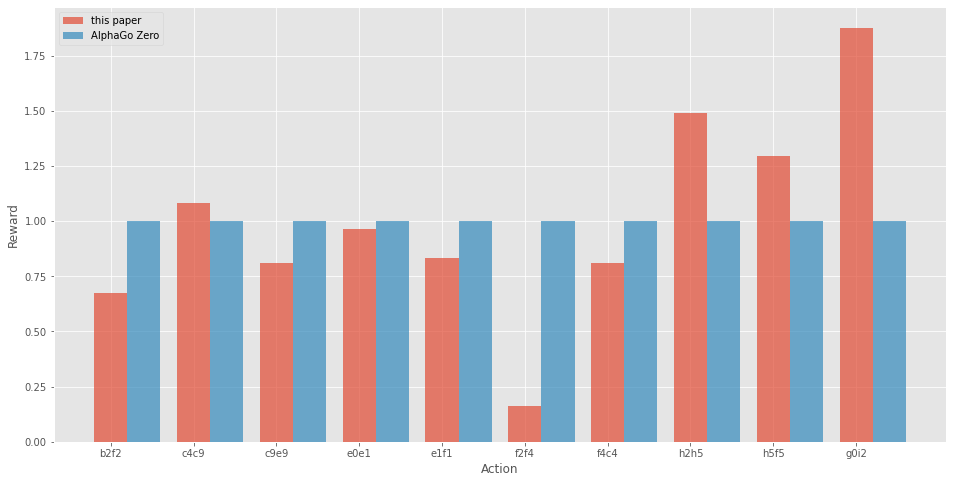

In [128]:
custom_ticks = list(range(len(hoho_match_contribution_data)))
custom_labels = hoho_match_contribution_data["action_type"].values.tolist()
plt.figure(figsize = (16, 8))
plt.bar(range(len(hoho_match_contribution_data)), hoho_match_contribution_data["mine"], width=0.4, alpha=0.7, label='this paper' )
plt.bar([i + 0.4 for i in range(len(hoho_match_contribution_data))], hoho_match_contribution_data["alphago_zero"], width=0.4, alpha=0.7, label='AlphaGo Zero'  )
plt.xticks(custom_ticks, custom_labels)
plt.xlabel('Action')
plt.ylabel('Reward')
plt.legend(loc='upper left')
plt.show()